# 2.7.6 Ejercicios
Para los datos de Datarium marketing, analiza los supuestos. Explica tus resultados y sube tus respuestas a github.

## 0. Importar y Cargar Datos

In [66]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

from statsmodels.stats.anova import anova_lm 
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

In [2]:
DatasetMarketing = pd.read_csv('./marketing_dataset.csv')

## 1. Modelo

Se hacen uso de las tres variables para que, por medio de la verificación de los supuestos, se esté refinando.

In [3]:
TargetLabel = 'sales'
FeaturesModel_0 = ['youtube','facebook','newspaper']

LinearModel_0 = smf.ols(
    f"{TargetLabel} ~ " + ' + '.join(FeaturesModel_0),
    DatasetMarketing
).fit()

LinearModel_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           1.58e-96
Time:                        07:28:12   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.000       2.789       4.265
youtube        0.0458      0.001     32.809      0.000       0.043       0.049
facebook       0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ``a``. Supuestos por Definición

Los siguientes supuestos son verificados por como se construye el modelo y por el propio conjunto de datos:
* El modelo sea lineal en sus parámetros
* $N > p+1$
* Variación en los valores de la variable de respuesta

In [4]:
# Más instancias que parámetros a estimar

DatasetMarketing.shape[0] , len(LinearModel_0.params)

(200, 4)

In [5]:
# Varianza en la variable de respuesta

DatasetMarketing['sales'].var(ddof=1) , DatasetMarketing['sales'].std(ddof=1)

(np.float64(39.199468341708545), np.float64(6.260947878852574))

## ``b``. Colinealidad

Las variables `facebook` y `newspaper` se encuentra correlacionadas con un puntaje de $0.35$, pero `newspaper` no tiene un impacto significativo en las predicciones del modelo. Por lo tanto, para reducir el problema de colinealidad, se decide eliminar está variable y crea una modelo reducido.

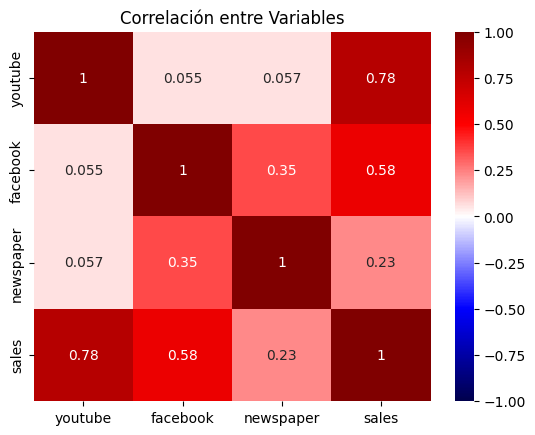

In [6]:
fig , axes = plt.subplots()

sns.heatmap(
    DatasetMarketing[[*FeaturesModel_0,TargetLabel]].corr(),
    vmin = -1,
    vmax = 1,

    annot = True,
    cmap = 'seismic',
    ax = axes,
)
axes.set_title('Correlación entre Variables');

In [7]:
FeaturesModel_1 = FeaturesModel_0[:-1]
LinearModel_1 = smf.ols(
    f"{TargetLabel} ~ " + ' + '.join(FeaturesModel_1),
    DatasetMarketing
).fit()

LinearModel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           4.83e-98
Time:                        07:28:13   Log-Likelihood:                -422.66
No. Observations:                 200   AIC:                             851.3
Df Residuals:                     197   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5053      0.353      9.919      0.000       2.808       4.202
youtube        0.0458      0.001     32.909      0.000       0.043       0.048
facebook       0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         510.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Comparativa entre modelos

anova_lm(LinearModel_0,LinearModel_1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,196.0,801.828379,0.0,NaN,NaN,NaN
1,197.0,801.956131,-1.0,-0.127753,0.031382,NaN


## `c`. Correcta Especificación del Modelo

Usando una prueba F sobre el modelo, se tiene que representa una regresión significativa; por lo tanto de manera general se encuentra bien especificado. Y al comprobar la significancia de los aportes de cada variable de forma individual, se tiene que sí son significativos para el modelo. Con ello, se sigue apoyando el supuesto de la correcta especificación.

Al emplear los plots presentados, para determinar cómo se comportan los residuales del modelos respecto a las variables y evaluar el propio ajuste del modelo. Se tiene que el modelo podría no estar bien especificado, debido a que los residuales respecto a las variables no tienen un comportamiento aleatorio, sino que pareciera que siguen algún valor funcional. Mientras que los valores estimados se ajustan adecuadamente a los valores observados, no padece de tantos valores extremos o atípicos.

Con las últimas consideraciones, se considera que la especificación del modelo podría ser mejorada para reducir una posible dependencia entre los valores errores y los valores de las variable. 

In [9]:
# Prueba F

print(f'F_0 :: {LinearModel_1.fvalue}\np-valor :: {LinearModel_1.f_pvalue}')

F_0 :: 859.6177183058211
p-valor :: 4.827361851335395e-98


In [10]:
# Pruebas t por variable

for (_feature,_t_value) , _t_pvalue in zip(LinearModel_1.tvalues.items(),LinearModel_1.pvalues):
    print(f'{_feature} :: t_0 : {_t_value} , p-valor : {_t_pvalue}')

Intercept :: t_0 : 9.919192851711605 , p-valor : 4.565556820356336e-19
youtube :: t_0 : 32.908708260613466 , p-valor : 5.436980344622892e-82
facebook :: t_0 : 23.38244600964968 , p-valor : 9.776971647558066e-59


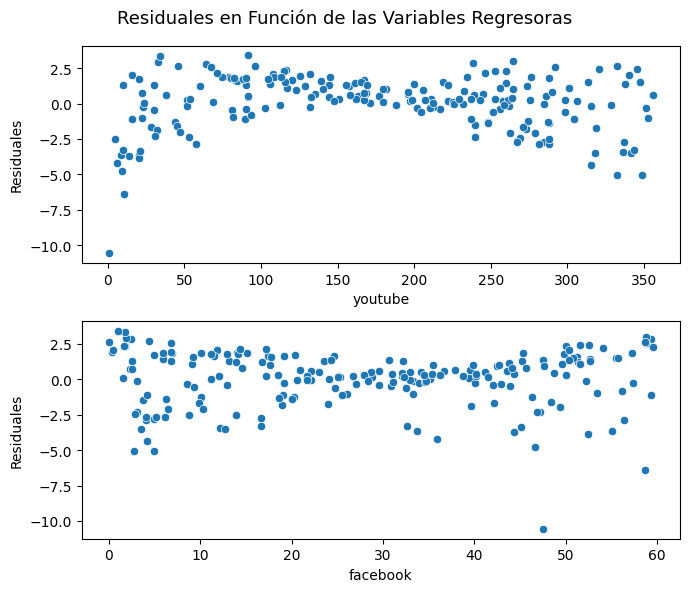

In [11]:
fig , axes = plt.subplots(
    2,
    figsize = (7,6),
    layout = 'tight',
)

for _feature , _ax in zip(FeaturesModel_1,axes.ravel()):
    sns.scatterplot(
        x = DatasetMarketing[_feature],
        y = LinearModel_1.resid,
        ax = _ax,
    )
    _ax.set_ylabel('Residuales')

fig.suptitle(
    'Residuales en Función de las Variables Regresoras',
    size=13,
);

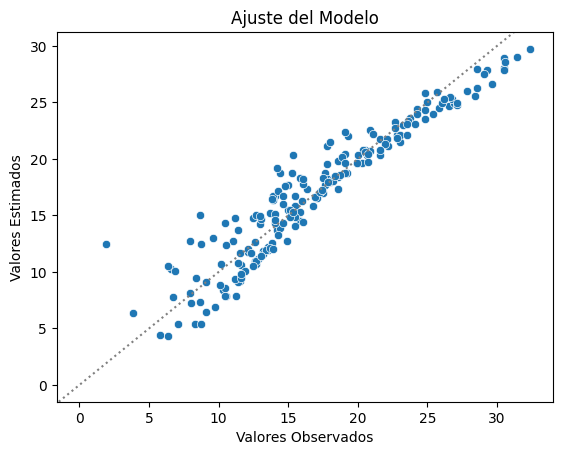

In [12]:
fig , axes = plt.subplots()

sns.scatterplot(
    x = DatasetMarketing[TargetLabel],
    y = LinearModel_1.fittedvalues,
    ax = axes,
)
axes.axline(
    (0,0),
    slope = 1,
    color = 'gray',
    linestyle = ':',
)
axes.set_title('Ajuste del Modelo')
axes.set_xlabel('Valores Observados')
axes.set_ylabel('Valores Estimados');

## `d`. Homecedasticidad

Aunque la prueba de Breusch-Pagan arroja que no existe evidencia significativa para rechazar que no haya homocedasticidad en los residuales, se tiene que en el plot de los residuales en función de los valores de la variable respuesta sigue un patrón funcional, es decir, tiene forma de curva cuadrática. 

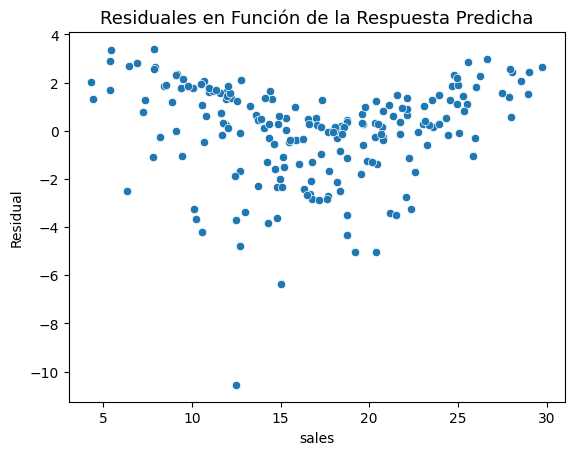

In [49]:
fig , axes = plt.subplots()
    
sns.scatterplot(
    x = LinearModel_1.fittedvalues,
    y = LinearModel_1.resid,
    ax = axes,
)
axes.set_xlabel(TargetLabel)
axes.set_ylabel('Residual')
axes.set_title('Residuales en Función de la Respuesta Predicha',size=13);

In [50]:
# Prueba de Breusch-Pagan

het_breuschpagan(LinearModel_1.resid,LinearModel_1.model.exog)[1]

np.float64(0.09029710011529948)

## `e`. Normalidad de los Errores

Al generar los q-q plot de los residuos se tiene que las colas son ligeras y además de que es concava esto hace que los residuales aparentemente no sigan una distribución normal; al realizar la prueba de Shapiro-Wilk, se tiene que se rechaza la hipótesis de normalidad de los residuales, esto podría afectar en las predicciones que se realicen con el modelo, aunque tengan un media igual a $0$ (esto derivado de la prueba t). Las anteriores observaciones son derivadas de que los residuales tienen un comportamiento no aleatorio o que siguen un patrón curvilíneo.

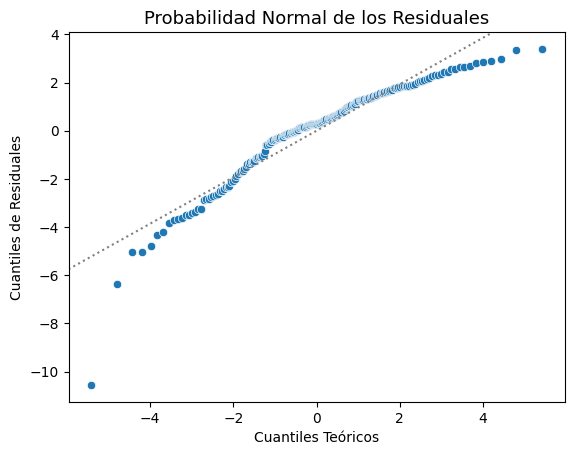

In [28]:
QuantilesTheoObs , RegressionLineParams = stats.probplot(
    LinearModel_1.resid,
    dist = 'norm',
    sparams = (0,LinearModel_1.resid.std(ddof=1))
)

fig , axes = plt.subplots()
sns.scatterplot(
    x = QuantilesTheoObs[0],
    y = QuantilesTheoObs[1],
    ax = axes,
)

axes.axline(
    (0,0),
    slope=RegressionLineParams[0],
    color = 'gray',
    linestyle = ':',
)
axes.set_xlabel('Cuantiles Teóricos')
axes.set_ylabel('Cuantiles de Residuales')
axes.set_title('Probabilidad Normal de los Residuales',size=13);

In [ ]:
# Prueba de Shapiro-Wilk

stats.shapiro(
    LinearModel_1.resid,
)

ShapiroResult(statistic=np.float64(0.9180378571450863), pvalue=np.float64(4.190054732878307e-09))

In [ ]:
# Prueba de media igual a 0

stats.ttest_1samp(
    LinearModel_1.resid,
    0,
)

TtestResult(statistic=np.float64(-1.1700597861786517e-13), pvalue=np.float64(0.9999999999999067), df=np.int64(199))

## `f`. No Autocorrelación de los Errores

Del estadístico de la prueba de Durbin-Watson se tiene que no existe una autocorrelación de los residuales debido a que el valor se aproxima a $2$. Por lo que el supuesto de autocorrelaión de los errores se verifica

In [ ]:
# Prueba de Durbin-Watson

durbin_watson(LinearModel_1.resid)

np.float64(2.080780601004527)